### 导入所需库及配置项

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 显示中文
plt.rcParams['font.family'] = 'SimHei'
plt.rcParams['axes.unicode_minus'] = False

### 读取示例数据集并可视化

In [2]:
# 读取 txt 文件
dataSet = np.loadtxt('testData.txt' , delimiter='\t')
dataSet[:5]

array([[ 3.275154,  2.957587],
       [-3.344465,  2.603513],
       [ 0.355083, -3.376585],
       [ 1.852435,  3.547351],
       [-2.078973,  2.552013]])

In [3]:
dataSet.shape

(60, 2)

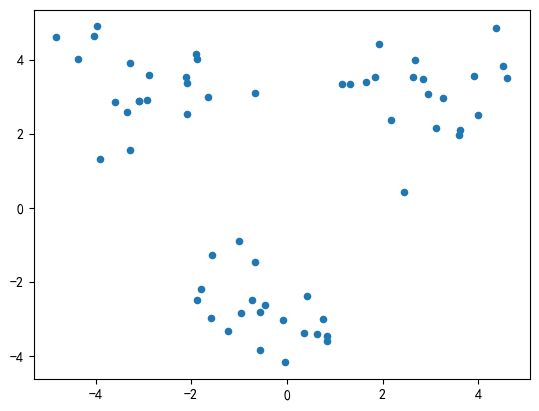

In [4]:
# 绘图
plt.scatter(dataSet[:,0] , dataSet[:,1] , s=20 )

### 定义功能函数

In [5]:
# 定义计算两个向量的欧式距离的函数
def euclidean_distance(vecA, vecB):
    return np.sqrt(sum(pow(vecA - vecB, 2)))

In [6]:
# 定义质心初始化函数
def centroids_init(dataSet , k):
    """
    质心初始化函数
    Parameters，参数说明:
    dataSet：数据集
    k:簇的数目
    输出：
    centroids：簇的质心矩阵
    """
    # 数据的特征维度数目
    n = dataSet.shape[1]
    # 创建一个全零的数组
    centroids = np.zeros((k,n))
    for j in range(n):
        # 计算每个特征维度的的最小值
        minJ = min(dataSet[:,j])
        # 每个特征维度最大值 - 最小值
        rangeJ = max(dataSet[:,j]) - min(dataSet[:,j])
        # 在整个数据集的边界范围内，创建随机质心
        centroids[:,j] = minJ + rangeJ*np.random.rand(k,)
    return centroids

### K-means算法实现

#### 按照“计算质心-分配簇-重新计算”的流程反复迭代，直到所有数据点的簇分配结果不在改变为止

In [7]:
def kMeans(dataSet, k, calculatedists=euclidean_distance, createCent=centroids_init):
    """
    输入：
    dataSet：数据集
    k:簇的数目
    calculatedists:计算距离的函数
    createCent:创建初始簇质心的函数
    输出：
    centroids：簇的质心矩阵
    clusterAssment：簇分配结果以及与簇质心间的距离
    """
    m = dataSet.shape[0]
    # 存储每个点的簇分配结果（第一列）以及与簇质心间的距离（第二列）
    clusterAssment = np.zeros((m,2))
    # 生成初始簇质心
    centroids = createCent(dataSet,k)
    
    clusterChange = True
    while clusterChange:
        clusterChange = False
        for i in range(m):
            minDist = np.inf
            minIndex = -1
            for j in range(k):
                distJI = calculatedists(centroids[j,:] , dataSet[i,:])
                if distJI < minDist:
                    minDist = distJI
                    minIndex = j
            if clusterAssment[i,0] != minIndex:clusterChange = True
            clusterAssment[i,:] = minIndex , minDist**2
        print(centroids)
        for cent in range(k):
            # 获取每个簇包含的所有点
            ptsInClust = dataSet[clusterAssment[:,0] == cent]
            # 计算每个簇的数据点的平均值，并将其作为新的簇中心点
            centroids[cent,:] = np.mean(ptsInClust, axis=0)
    return centroids, clusterAssment

### 可视化聚类结果

In [8]:
centroids, clusterAssment = kMeans(dataSet, 3)

[[-3.30944478 -2.38785422]
 [-3.31281523 -2.78155515]
 [ 0.06655597  2.27227695]]
[[-1.38716275 -1.475158  ]
 [-0.15447569 -3.26445692]
 [ 0.09338772  3.27587208]]
[[-2.01085771 -0.76557657]
 [-0.15366667 -3.15354   ]
 [ 0.18204313  3.32057745]]


In [9]:
centroids

array([[-2.01085771, -0.76557657],
       [-0.15366667, -3.15354   ],
       [ 0.18204313,  3.32057745]])

In [10]:
clusterAssment

array([[2.00000000e+00, 9.69909691e+00],
       [2.00000000e+00, 1.29504410e+01],
       [1.00000000e+00, 3.08575295e-01],
       [2.00000000e+00, 2.84163524e+00],
       [2.00000000e+00, 5.70288526e+00],
       [0.00000000e+00, 1.04862275e+00],
       [2.00000000e+00, 6.72300728e+00],
       [2.00000000e+00, 1.08869613e+01],
       [0.00000000e+00, 4.39400204e-01],
       [2.00000000e+00, 1.33755933e+01],
       [2.00000000e+00, 7.51976709e-01],
       [1.00000000e+00, 3.80393553e-01],
       [2.00000000e+00, 4.85265334e+00],
       [2.00000000e+00, 9.79116781e+00],
       [1.00000000e+00, 1.04487554e+00],
       [2.00000000e+00, 1.33027793e+01],
       [0.00000000e+00, 7.98668433e+00],
       [1.00000000e+00, 2.73561785e-01],
       [2.00000000e+00, 7.17549753e+00],
       [2.00000000e+00, 1.44771130e+01],
       [1.00000000e+00, 9.41179491e-01],
       [2.00000000e+00, 2.16487648e+00],
       [2.00000000e+00, 5.13405130e+00],
       [1.00000000e+00, 7.56341230e-01],
       [2.000000

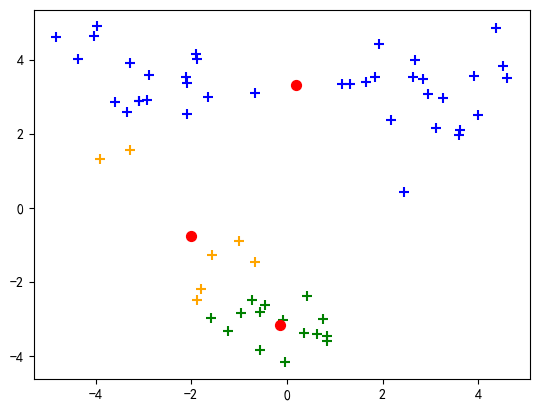

In [11]:
color = ["orange" , "green" , "blue" , "purple"]
m = dataSet.shape[0]

# 根据簇类别分别可视化原数据点
for i in range(m):
    if clusterAssment[i,0] == 0:
        plt.scatter(dataSet[i,0] , dataSet[i,1] , marker="+" , s=50 , color=color[0])
    if clusterAssment[i,0] == 1:
        plt.scatter(dataSet[i,0] , dataSet[i,1] , marker="+" , s=50 , color=color[1])
    if clusterAssment[i,0] == 2:
        plt.scatter(dataSet[i,0] , dataSet[i,1] , marker="+" , s=50 , color=color[2])
        
# 可视化最终簇质心点
for i in range(3):
    plt.scatter(centroids[i,0] , centroids[i,1] , marker="o" , s=50 , color="red")